In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Effect of Home-Away Win

0 - Rising Pune Supergiant; 1 - Mumbai Indians; 2 - Chennai Super Kings; 3 - Delhi Capitals; 4 - Sunrisers Hyderabad; 5 - Rajasthan Royals; 6 - Deccan Chargers; 7 - Kings XI Punjab; 8 - Royal Challengers Bangalore; 9 - Kolkata Knight Riders; 10 - Delhi Daredevils; 11 - Pune Warriors; 12 - Kochi Tuskers Kerala; 13 - Gujarat Lions; 

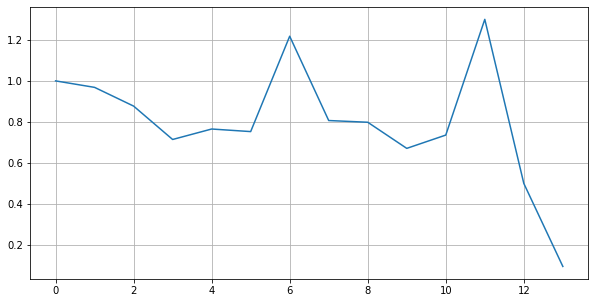

In [57]:
df=pd.read_csv('teamwise_home_and_away.csv')

home=df['home_win_percentage'].to_numpy()
away=df['away_win_percentage'].to_numpy()

ratio = home/away
ratio = ratio
fig=plt.figure(figsize=(10,5))
plt.plot(range(len(away)),ratio)
plt.grid()

for i in range(len(home)):
    print(i,'-',df['team'][i],end="; ")

In [60]:
low=[]; med=[]; high=[]
for i in range(len(ratio)):
    if abs(ratio[i]-1)<=0.1:
        low.append(df['team'][i])
    elif abs(ratio[i]-1)<=0.4:
        med.append(df['team'][i])
    else:
        high.append(df['team'][i])
print('Least: ',low)
print('Moderate: ',med)
print('Most: ',high)

Least:  ['Rising Pune Supergiant', 'Mumbai Indians']
Moderate:  ['Chennai Super Kings', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Deccan Chargers', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Pune Warriors']
Most:  ['Kochi Tuskers Kerala', 'Gujarat Lions']


**LEAST** effect on home-away games: Rising Pune Supergiant & Mumbai Indians<br>
**MOST** effect on home-away games : Kochi Tuskers Kerala & Gujarat Lions have most impact on home-away games.<br>
Rest have **MODERATE** effects.

Rising Pune Supergiant, Kochi Tuskers Kerala & Gujarat Lions have played very few matches relative to other teams, so it is expected that they will move to MODERATE section after several matches.
Only Mumbai Indians show very less effect after playing significant matches.

Execpt **Deccan Chargers** & **Pune Warriors**, all other teams have played better in away matches than in home matches.

So, on average teams have slight effect of home-away match and most of the teams perform better in away matches.

## Effect of Toss Winning

In [73]:
# teams name dictionary
df=pd.read_csv('teams.csv')
ant=list(df['team1']); teams={}
for i in range(len(ant)):
    teams[ant[i]]=i
# print(len(teams))
df=pd.read_csv('matches.csv')
# df.dropna(inplace=True)
df = df[df['winner'].isnull()==False]
teams

{'Pune Warriors': 0,
 'Kolkata Knight Riders': 1,
 'Rajasthan Royals': 2,
 'Kochi Tuskers Kerala': 3,
 'Gujarat Lions': 4,
 'Chennai Super Kings': 5,
 'Rising Pune Supergiants': 6,
 'Delhi Daredevils': 7,
 'Deccan Chargers': 8,
 'Delhi Capitals': 9,
 'Mumbai Indians': 10,
 'Sunrisers Hyderabad': 11,
 'Rising Pune Supergiant': 12,
 'Royal Challengers Bangalore': 13,
 'Kings XI Punjab': 14}

In [74]:
guii={'bat':0, 'field':1}
tosss=pd.DataFrame(columns = ['Tot_Tw','Tot_Tl','Tw_Wn','Tl_Wn','Tw_per','Tl_per'])
for i in range(15):
    nr={'Tot_Tw':0, 'Tot_Tl':0, 'Tw_Wn':0 ,'Tl_Wn':0, 'Tw_per':0, 'Tl_per':0}
    tosss=tosss.append(nr,ignore_index=True)

for k in df.index:
    i=teams[df['team1'][k]]; j=teams[df['team2'][k]]
    if teams[df['toss_winner'][k]]==i:
        tosss['Tot_Tw'][i]+=1; tosss['Tot_Tl'][j]+=1
        if teams[df['winner'][k]]==i:
            tosss['Tw_Wn'][i]+=1
        else:
            tosss['Tl_Wn'][j]+=1
    else:
        tosss['Tot_Tw'][j]+=1; tosss['Tot_Tl'][i]+=1;
        if teams[df['winner'][k]]==j:
            tosss['Tw_Wn'][j]+=1
        else:
            tosss['Tl_Wn'][i]+=1
for i in tosss.index:
    tosss['Tw_per'][i] = (tosss['Tw_Wn'][i]/tosss['Tot_Tw'][i])*100
    tosss['Tl_per'][i] = (tosss['Tl_Wn'][i]/tosss['Tot_Tl'][i])*100

Least:  ['Rajasthan Royals', 'Mumbai Indians']
Moderate:  ['Pune Warriors', 'Kolkata Knight Riders', 'Kochi Tuskers Kerala', 'Chennai Super Kings', 'Rising Pune Supergiants', 'Delhi Daredevils', 'Deccan Chargers', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Kings XI Punjab']
Most:  ['Gujarat Lions', 'Rising Pune Supergiant']


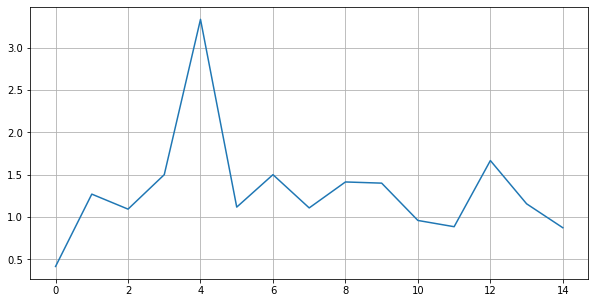

In [71]:
t1=tosss['Tw_per'].to_numpy(); t2=tosss['Tl_per'].to_numpy()
ratio=t1/t2
fig=plt.figure(figsize=(10,5))
plt.plot(range(len(ratio)),ratio)
plt.grid()

low=[]; med=[]; high=[]
for i in range(len(ratio)):
    if abs(ratio[i]-1)<=0.1:
        low.append(ant[i])
    elif abs(ratio[i]-1)<=0.6:
        med.append(ant[i])
    else:
        high.append(ant[i])
print('Least: ',low)
print('Moderate: ',med)
print('Most: ',high)

Almost all teams won their matches when they won the match toss, except Mumbai Indians, Sunrisers Hydrabad, Pune Warriors, Kings XI Punjab. Out of which Mumbai Indians have LEAST affect and Sunrisers Hydrabad, Pune Warriors, Kings XI Punjab have MODERATE affect.<br>
Therefore, on average teams win their match when they win the toss